<a href="https://colab.research.google.com/github/manishmawatwal/DataScience/blob/main/VGG16_Cat_and_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import keras, os
from keras.models import Sequential
from keras.models import Model
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator  #import data with labels easily
import numpy as np
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [ ]:
#creating an object of ImageDataGenerator
#the ImageDataGenerator will automatically label all data inside cat folder as cat and vis-a-vis for dog folder
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="C:\\Users\\mawat\\Downloads\\trying\\train", target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="C:\\Users\\mawat\\Downloads\\trying\\test1", target_size=(224,224))

Found 204 images belonging to 1 classes.
Found 50 images belonging to 1 classes.


Initialising the model by specifying that the model is a sequential model.

Relu(Rectified Linear Unit) activation to each layers so that all the negative values are not passed to the next layer

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3), filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

After all the convolution we will pass the data to the dene layer to flatten the vector which comes out of the convolution.

The softmax layer will output the value between 0 and 1 based on the confidence of the model that which class the images belongs to.

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

We will use Adam optimiser to reach to the global minima while training out model. If we are stuck in local minima while training then the adam optimiser will help us to get out of local minima and reach global minima.
We will also specify the learning rate of the optimiser, here in this case it is set at 0.001
If our training is bouncing a lot on epochs then we need to decrease the learning rate so that we can reach global minima.

In [ ]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 56, 56, 256)      

ModelCheckpoint helps us to save the model by monitoring a specific parameter of the model. In this case I am monitoring validation accuracy by passing val_acc to ModelCheckpoint. The model will only be saved to disk if the validation accuracy of the model in current epoch is greater than what it was in the last epoch.

EarlyStopping helps us to stop the training of the model early if there is no increase in the parameter which I have set to monitor in EarlyStopping. In this case I am monitoring validation accuracy by passing val_acc to EarlyStopping. I have here set patience to 20 which means that the model will stop to train if it doesn’t see any rise in validation accuracy in 20 epochs.

In [ ]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor = 'val_accuracy', verbose = 1, save_best_only = True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 5, verbose = 1, mode = 'auto')
hist = model.fit_generator(steps_per_epoch = 5, generator = traindata, validation_data = testdata, validation_steps = 10, epochs = 10, callbacks=[checkpoint,early])

Epoch 1/10
5/5 [==============================] - ETA: 0s - loss: 36959305728.0000 - accuracy: 0.5286WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 10 batches). You may need to use the repeat() function when building your dataset.

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to vgg16_1.h5
5/5 [==============================] - 58s 12s/step - loss: 36959305728.0000 - accuracy: 0.5286 - val_loss: 465909284864.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 45s 9s/step - loss: 184722516869120.0000 - accuracy: 0.4571
Epoch 3/10
5/5 [==============================] - 43s 9s/step - loss: 211101662687789056.0000 - accuracy: 0.5429
Epoch 4/10
5/5 [==============================] - 42s 8s/step - loss: nan - accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 42s 8s/step - loss: nan - acc

All the training/validation accuracy and loss are stored in hist and we will visualise it from there.

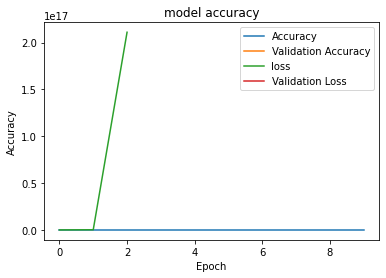

In [ ]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

To do predictions on the trained model we need to load the best saved model and pre-process the image and pass the image to the model for output.

Here we have loaded the image using image method in keras and converted it to numpy array and added an extra dimension to the image to image for matching NHWC (Number, Height, Width, Channel) format of keras.

dog


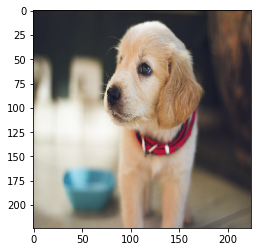

In [ ]:
img = image.load_img("C:\\Users\\mawat\\Downloads\\trying\\image.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')